# Credit Scoring Dataset – First Look
In this session, you will:
- Explore a raw dataset for credit scoring.
- Identify and fix common data quality issues.
- Engineer new features useful for predicting credit risk.

The dataset mimics real-world bank data, with deliberate issues (missing values, outliers, duplicates).

> **Note for Students**  
> This dataset is **synthetic** and created for **academic purposes only**.  
> It is not real customer data, but it mimics some of the real issues (like missing values, inconsistent categories, and outliers) that we often face in actual credit scoring use cases.


In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\kelkess\AppData\Local\anaconda3\envs\cash\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Section 1: Quick EDA (Exploratory Data Analysis)
Before cleaning and feature engineering, let's understand the dataset.

Goals:
- Check dataset shape and column types
- Inspect distributions of numeric variables
- Explore categorical variables
- Identify issues: missing values, outliers, inconsistencies

### Step 1.1 – Dataset Overview
- Check shape and column types
- Preview first rows

In [3]:
import pandas as pd

# Load enhanced dataset with realistic relationships
df = pd.read_csv('credit_scoring.csv')
df.head()

,customer_id,age,gender,income,employment_type,education,total_debt,balance,credit_limit,late_payments,monthly_balance,default
0,1,38.0,Male,30250.0,Salaried,PhD,25531,8894,10217,2,2541,0
1,2,18.0,Female,18709.0,Salaried,Bachelor,14517,10346,15245,3,2692,1
2,3,34.0,Male,4563.0,Salaried,Master,39234,10962,17609,2,2957,0
3,4,56.0,Female,48782.0,Salaried,Bachelor,12253,21960,12636,3,2398,0
4,5,38.0,Male,47630.0,Self employed,Master,3108,-496,18226,0,4165,0


In [4]:
df.head(10)

,customer_id,age,gender,income,employment_type,education,total_debt,balance,credit_limit,late_payments,monthly_balance,default
0,1,38.0,Male,30250.0,Salaried,PhD,25531,8894,10217,2,2541,0
1,2,18.0,Female,18709.0,Salaried,Bachelor,14517,10346,15245,3,2692,1
2,3,34.0,Male,4563.0,Salaried,Master,39234,10962,17609,2,2957,0
3,4,56.0,Female,48782.0,Salaried,Bachelor,12253,21960,12636,3,2398,0
4,5,38.0,Male,47630.0,Self employed,Master,3108,-496,18226,0,4165,0
5,6,24.0,Male,32569.0,Unemployed,High School,15287,13416,16838,1,1395,0
6,7,24.0,Male,16524.0,Self employed,Master,245,9425,9010,1,1827,0
7,8,28.0,Male,14239.0,Salaried,High School,27510,12833,18112,5,3181,1
8,9,31.0,Female,18144.0,Salaried,Master,-650,6713,20181,5,2448,0
9,10,19.0,Male,6008.0,Unemployed,PhD,20284,9755,16028,3,1336,1


In [5]:
print("Shape:", df.shape)
df.info()

Shape: (1010, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1010 non-null   int64  
 1   age              960 non-null    float64
 2   gender           1010 non-null   object 
 3   income           990 non-null    float64
 4   employment_type  960 non-null    object 
 5   education        1010 non-null   object 
 6   total_debt       1010 non-null   int64  
 7   balance          1010 non-null   int64  
 8   credit_limit     1010 non-null   int64  
 9   late_payments    1010 non-null   int64  
 10  monthly_balance  1010 non-null   int64  
 11  default          1010 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 94.8+ KB


### Step 1.2 – Summary Statistics
- Describe numeric variables
- Count categorical values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1010 non-null   int64  
 1   age              960 non-null    float64
 2   gender           1010 non-null   object 
 3   income           990 non-null    float64
 4   employment_type  960 non-null    object 
 5   education        1010 non-null   object 
 6   total_debt       1010 non-null   int64  
 7   balance          1010 non-null   int64  
 8   credit_limit     1010 non-null   int64  
 9   late_payments    1010 non-null   int64  
 10  monthly_balance  1010 non-null   int64  
 11  default          1010 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 94.8+ KB


In [7]:
df['employment_type'].value_counts(dropna=False)

employment_type
Salaried         578
Self-Employed    156
Self employed    143
Unemployed        83
NaN               50
Name: count, dtype: int64

### Step 1.3 – Missing Values
- Identify columns with NaN
- Check proportions of missing


*Explanation*: Missing values can bias results. Small amounts may be dropped, but important fields are often imputed with logical strategies.

In [ ]:
df.isnull().sum()

customer_id         0
age                50
gender              0
income             20
employment_type    50
education           0
total_debt          0
balance             0
credit_limit        0
late_payments       0
monthly_balance     0
default             0
dtype: int64

### Step 1.4 – Distributions & Outliers
- Plot histograms for numeric columns
- Use boxplots to detect outliers


*Explanation*: Visualizing distributions helps detect skewness, outliers, or unrealistic values (e.g., negative income).

In [ ]:
fig = px.histogram(df, x="age", nbins=30, title="Age Distribution")
fig.show()

In [ ]:

fig = px.histogram(df, x="income", nbins=30, title="Income Distribution")
fig.show()


In [ ]:

fig = px.histogram(df, x="monthly_balance", nbins=30, title="Monthly Balance Distribution")
fig.show()


In [ ]:

# Boxplot for monthly_balance
fig = px.box(df, y="monthly_balance", title="Monthly Balance")
fig.show()


**Interpretation:**

- Income shows wide variation, with some higher earners but many around lower ranges.
- Monthly balance has outliers — some customers go very negative or very high.

### Step 1.5 – Target Variable
- Check distribution of the target
- See if classes are balanced (default vs non-default)

*Explanation*: Checking class balance is critical. If imbalanced, advanced techniques like resampling or weighted models may be needed.

In [28]:
df['default'].value_counts()

default
0    789
1    221
Name: count, dtype: int64

In [29]:

# Distribution of default vs non-default
default_dist = df['default'].value_counts(normalize=True).reset_index()
default_dist.columns = ['default', 'proportion']

fig = px.bar(
    default_dist,
    x='default',
    y='proportion',
    text='proportion',
    title="Default vs Non-default Distribution",
    labels={'default': 'Class', 'proportion': 'Proportion'}
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_yaxes(tickformat=".0%")
fig.show()



### Class Imbalance Note

In this dataset, about 20% of customers are **defaults** while 80% are **non-defaults**. This reflects a realistic imbalance: most customers repay their loans. However, this imbalance means accuracy alone is misleading — we need to also look at precision, recall, and F1.

# Section 2: Data Cleaning
Now we fix issues found in EDA.

Goals:
- Handle missing values, duplicates, and outliers.
- Standardize categories and check data consistency.

### Step 2.1 – Handle Missing Values
Choose a strategy:
- Drop rows
- Fill with mean/median/mode
- Use domain knowledge (e.g., employment type → "Unknown")


*Explanation*: Imputation choice depends on distribution. Median is safer with skewed data (like income), while mean works for symmetric data.

In [15]:
df['age'] = df['age'].fillna(df['age'].median())
df['employment_type'] = df['employment_type'].fillna("Unknown")

In [16]:
df['income'] = df['income'].fillna(df['income'].median())

### Step 2.2 – Remove Duplicates
- Check duplicate rows
- Drop if necessary

*Explanation*: Duplicates usually arise from repeated entries. Always confirm before dropping, since some repeats may be legitimate.

In [17]:
df = df.drop_duplicates()

### Step 2.3 – Standardize Categories
- Fix inconsistent labels
- Ensure uniform formatting (e.g., lowercase)


*Explanation*: Standardizing categories avoids treating 'Self employed' and 'self-employed' as separate groups.

In [18]:
df['employment_type'] = df['employment_type'].str.strip().str.lower()
df['employment_type'].unique()

array(['salaried', 'self employed', 'unemployed', 'self-employed',
       'unknown'], dtype=object)

In [19]:
df['employment_type'] = df['employment_type'].replace({
    'self employed': 'self-employed',
    'self-employed': 'self-employed',
    'unemployed': 'unemployed',
    'salaried': 'salaried',
    'unknown': 'unknown'
})
df['employment_type'].unique()

array(['salaried', 'self-employed', 'unemployed', 'unknown'], dtype=object)

### Step 2.4 – Treat Outliers
- Cap extreme values
- Or replace with thresholds

*Explanation*: Outliers can heavily influence models. Options include capping, transformation (log), or removal.

In [21]:
cap = df['monthly_balance'].quantile(0.99)
df['monthly_balance'] = np.where(df['monthly_balance'] > cap, cap, df['monthly_balance'])

### Step 2.5 – Validate Logic
- Check impossible values (e.g., negative age)

*Explanation*: Logical validation ensures business sense (e.g., age cannot be negative, balance should not exceed credit limit drastically).

In [22]:
df['age'] = np.where(df['age'] < 0, abs(df['age']), df['age'])

# Section 3: Feature Engineering
We create new features that add business insight.

Goals:
- Encode categorical variables.
- Build useful ratios (e.g., debt-to-income, credit utilization).
- Group variables (e.g., age buckets).

### Step 3.1 – Encode Categorical Variables
- Convert categories into numeric form (e.g., one-hot encoding)
- Avoid implying order in non-ordinal categories

*Explanation*: Encoding turns categories into numeric form. One-hot encoding avoids implying order in non-ordinal categories.


In [23]:
df = pd.get_dummies(df, columns=['education'], drop_first=True)

df = pd.get_dummies(df, columns=['employment_type','gender'], drop_first=True)


### Step 3.2 – Create Ratios
- Debt-to-Income Ratio
- Credit Utilization (%)

*Explanation*: Ratios like debt-to-income capture relative financial health better than raw numbers.


In [24]:
df['debt_to_income'] = df['total_debt'] / (df['income']+1)

df['credit_utilization'] = df['balance'] / (df['credit_limit']+1)


### Step 3.3 – Group Continuous Variables
- Age buckets
- Income ranges

*Explanation*: Bucketing continuous variables can reveal non-linear relationships (e.g., young borrowers may behave differently).  
It also makes it easier to compare customers across categories (e.g., low-income vs high-income).


In [25]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,50,100], labels=['Young','Mid','Senior'])

df['alt_age_group'] = pd.cut(df['age'], bins=[18,25,40,60,100], labels=['18-25','26-40','41-60','60+'])

df['income_group'] = pd.cut(df['income'], bins=[0,30000,60000,90000,200000], labels=['Low','Medium','High','Very High'])

## 🔍 Feature Insights After Engineering

Now that we created **debt-to-income ratio, credit utilization, age groups, and income groups**, we can visualize how these engineered features relate to default risk.

The goal is to see whether these transformations reveal clearer patterns compared to the raw features.

In [26]:
# Debt-to-Income vs Default
fig1 = px.box(
    df,
    x='default',
    y='debt_to_income',
    title='Debt-to-Income Ratio vs Default',
)
fig1.show()

# Credit Utilization vs Default
fig2 = px.box(
    df,
    x='default',
    y='credit_utilization',
    title='Credit Utilization vs Default',
)
fig2.show()

# Default rate by Income Group
income_group_default = df.groupby('income_group')['default'].mean().reset_index()
fig3 = px.bar(income_group_default, x='income_group', y='default', title='Default Rate by Income Group')
fig3.show()

# Default rate by Age Group
age_group_default = df.groupby('age_group')['default'].mean().reset_index()
fig4 = px.bar(age_group_default, x='age_group', y='default', title='Default Rate by Age Group')
fig4.show()

C:\Users\kelkess\AppData\Local\Temp\ipykernel_19744\2326404953.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\kelkess\AppData\Local\Temp\ipykernel_19744\2326404953.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Interpretation:**

- Customers with high **debt-to-income ratios** are clearly riskier.
- **Credit utilization** close to 1.0 (maxing out their credit limit) signals much higher default probability.

**Interpretation:**

- Lower income groups show a much higher proportion of defaults.

**Observations:**
- Customers with **higher debt-to-income ratios** are more likely to default.
- **Credit utilization above 0.8** signals higher default risk.
- Lower income groups have visibly higher default rates.

## Section 4: Simple Modelling

Now that the dataset is cleaned and features engineered, we can try a simple model.
- Split data into train/test sets
- Fit a Logistic Regression model
- Evaluate using accuracy, precision, recall, and F1-score

⚠️ Note: The goal is not to achieve the best model here, but to connect the data preparation steps with prediction.

Accuracy: 0.8118811881188119
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       246
           1       0.50      0.02      0.03        57

    accuracy                           0.81       303
   macro avg       0.66      0.51      0.46       303
weighted avg       0.75      0.81      0.73       303



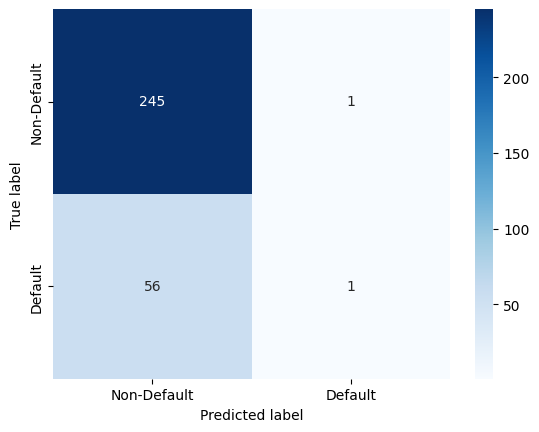

In [27]:

# Define target and features
y = df['default']
X = df.drop(columns=['default','customer_id'])

# One-hot encode categorical variables if any remain
X = pd.get_dummies(X, drop_first=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default','Default'], yticklabels=['Non-Default','Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()